In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_colwidth', None)

In [2]:
df_pre=pd.read_parquet('accident_vehicle_preprocessed.parquet')
df_pre.head()

,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Journey_Purpose_of_Driver,Junction_Location,make,model,Propulsion_Code,Sex_of_Driver,...,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,Year_y,InScotland,Hour,Day,Month,Age_of_Driver
0,3.000000,0,5.268217,8268.00000,1,6,93,8118,5,1,...,0,30,1,1,2005,0,17,5,1,45.0
1,5.000000,3,3.000000,8300.00000,1,8,93,8118,5,1,...,3,30,1,1,2005,0,0,6,1,35.0
2,10.000000,0,5.268217,85.00000,2,8,140,8118,8,1,...,3,30,1,1,2005,0,21,10,1,55.0
3,6.402357,0,5.268217,2142.73833,2,0,15,3699,0,1,...,3,30,1,1,2005,0,20,13,1,35.0
4,4.000000,3,6.000000,4266.00000,2,0,240,12714,8,1,...,3,30,1,1,2005,0,20,13,1,45.0


In [3]:
df=df_pre[df_pre['Accident_Severity']>0]
df['Accident_Severity'].value_counts()

1    59062
2     6695
Name: Accident_Severity, dtype: int64

In [4]:
df2=df.copy()

In [5]:
#identify dependent and independent variables
X=df2.drop('Accident_Severity', axis=1)
y=df2.Accident_Severity

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=11)

# Model Implementation: SVM/SVC

In [7]:
from sklearn.svm import SVC

classifier=SVC(kernel='rbf', random_state=1)
classifier.fit(X_train,y_train)

SVC(random_state=1)

In [8]:
y_pred=classifier.predict(X_test)

In [9]:
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix,classification_report


# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ACCURACY OF THE MODEL:  0.8974300486618005
[[11803     0]
 [ 1349     0]]
              precision    recall  f1-score   support

           1       0.90      1.00      0.95     11803
           2       0.00      0.00      0.00      1349

    accuracy                           0.90     13152
   macro avg       0.45      0.50      0.47     13152
weighted avg       0.81      0.90      0.85     13152



C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\oo_wa\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


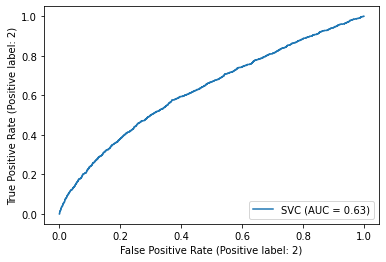

In [10]:
metrics.plot_roc_curve(classifier, X_test, y_test) 
plt.show()

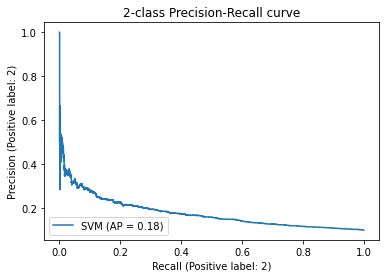

In [11]:
display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, name="SVM"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
